<a href="https://colab.research.google.com/github/fora22/Data_Science/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

In [3]:
X = 2*np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100,1)

y = 4 + 3x + &theta;

In [4]:
import matplotlib.pyplot as plt

In [5]:
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

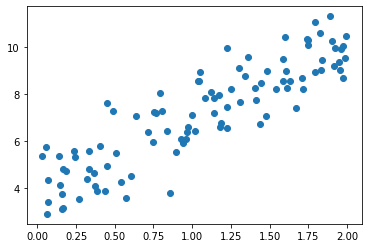

In [6]:
plt.scatter(X, y)

# 정규방정식(Normal Equation)

$\hat{\theta} (X^{T} \cdot X)^{-1}  \cdot X^{T} \cdot y $

- $\hat{\theta}$는 비용 함수를 최소화하는 $\theta\ 값

- $\mathbf{y}$는   $y^{(1)}$부터 $y^{(m)}$까지 포함하는 target 벡터



In [7]:
X_b = np.c_[np.ones((100,1)), X]

In [8]:
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [9]:
theta_best

array([[3.86312739],
       [3.131299  ]])

In [10]:
X_new = np.array([[0],[2]])

In [11]:
X_new_b = np.c_[np.ones((2,1)), X_new]  # 모든 샘플에 x0 = 1을 추가합니다.

In [12]:
y_predict = X_new_b.dot(theta_best)

In [13]:
y_predict

array([[ 3.86312739],
       [10.12572538]])

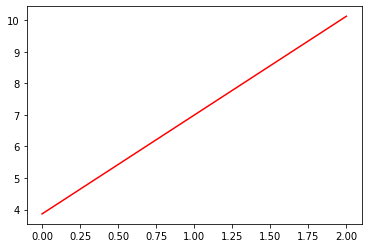

In [14]:
plt.plot(X_new, y_predict, "r-")

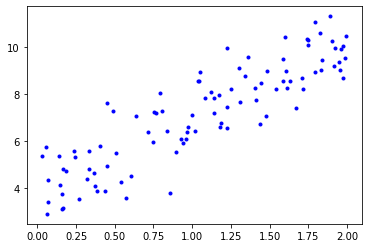

In [15]:
plt.plot(X,y, "b.")

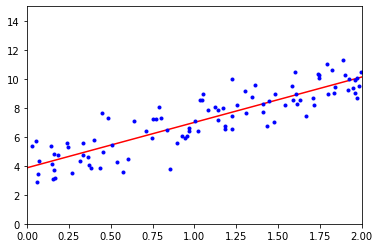

In [16]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X,y, "b.")
plt.axis([0,2,0,15])
plt.show()

In [19]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [20]:
lin_reg.intercept_, lin_reg.coef_

(array([3.86312739]), array([[3.131299]]))

In [21]:
lin_reg.predict(X_new)

array([[ 3.86312739],
       [10.12572538]])

# 경사 하강법(Gradient Descent)

## 배치 경사 하강법(Batch Gradient Descent)

$\theta^{next step} = \theta - \eta \nabla_{\theta}MSE(\theta) $

In [22]:
eta = 0.1 # 학습률
n_iterations = 1000
m = 100

In [23]:
theta = np.random.randn(2,1) # 가우시안 랜덤 초기화

In [24]:
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [25]:
theta

array([[3.86312739],
       [3.131299  ]])

## 확률적 경사 하강법(Stochastic Gradient Descent)

In [26]:
n_epochs = 50
t0, t1 = 5, 50 # 학습 스케줄 하이퍼파라미터

In [27]:
def learning_schedule(t):
    return t0 / (t + t1)

In [28]:
theta = np.random.randn(2,1) # 가우시안 랜덤 초기화

In [29]:
for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index + 1]
        yi = y[random_index:random_index + 1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

In [30]:
theta

array([[3.88999086],
       [3.13618454]])

In [31]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter = 50, penalty = None, eta0 = 0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.1, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=50,
             n_iter_no_change=5, penalty=None, power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [32]:
sgd_reg.intercept_, sgd_reg.coef_

(array([3.90295311]), array([3.1899431]))

|알고리즘|m이 클때|외부 메모리 학습 지원|n이 클때|스케일 조정 필요|사이킷런|
|------|:---:|:---:|:---:|:---:|:---:|
|정규방정식          |빠름|No |0  |No |LinearRegression|
|배치 경사 하강법    |느림|No |2  |Yes|n/a             |
|확률적 경사 하강법  |빠름|Yes|>=2|Yes|SGDRegression   |
|미니배치 경사 하강법|빠름|Yes|>=2|Yes|n/a             |